In [1]:
import rlssm
import pandas as pd
import os

/Users/Khamir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant < 5].reset_index(drop=True)


data['block_label'] += 1

data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0
...,...,...,...,...,...,...,...,...,...,...
953,4,3.0,75.0,51.0,44.0,3,1,37.0,1.396425,1.0
954,4,3.0,76.0,57.0,33.0,3,1,38.0,1.208049,1.0
955,4,3.0,77.0,42.0,30.0,3,1,39.0,1.276406,1.0
956,4,3.0,78.0,41.0,42.0,2,1,38.5,1.530143,0.0


In [3]:
model = rlssm.RLRDModel_2A(2,
                           separate_learning_rates=False,
                           nonlinear_mapping=True)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLRDM_2A', 'hierRLRDM_2A_nonlin', 2)

### Fit

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)

# bayesian model
alpha_priors = None
drift_scaling_priors = None
threshold_priors = None
ndt_priors = None

In [6]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    alpha_priors=alpha_priors,
    drift_scaling_priors=drift_scaling_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    print_diagnostics = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


#### Get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,30.000000
mean,0.996339
std,0.008527
min,0.985726
25%,0.990013
50%,0.993930
75%,1.001776
max,1.019313


In [8]:
model_fit.rhat.head()

,rhat,variable
0,0.986208,mu_alpha
1,0.991597,mu_drift_scaling
2,1.000868,mu_threshold
3,0.995581,mu_ndt
4,1.013531,mu_utility


#### Calculate wAIC

In [9]:
model_fit.waic

{'lppd': -636.7474790816682,
 'p_waic': 16.90342370150998,
 'waic': 1307.3018055663563,
 'waic_se': 70.24783871280151}

#### Check divergences

#### Get posteriors

In [10]:
model_fit.samples

,chain,draw,transf_mu_alpha,transf_mu_drift_scaling,transf_mu_threshold,transf_mu_ndt,transf_mu_utility,alpha_sbj[1],alpha_sbj[2],alpha_sbj[3],...,threshold_sbj[3],threshold_sbj[4],ndt_sbj[1],ndt_sbj[2],ndt_sbj[3],ndt_sbj[4],utility_sbj[1],utility_sbj[2],utility_sbj[3],utility_sbj[4]
0,0,50,0.389852,0.260160,2.039531,0.518704,0.753350,0.390858,0.389355,0.390347,...,2.040915,2.045270,0.634728,0.512488,0.656117,0.538625,1.256124,0.918817,0.856491,1.205676
1,0,69,0.378911,1.042213,2.033924,0.599594,0.759297,0.361105,0.421789,0.343681,...,1.790210,1.858753,0.651402,0.500500,0.731477,0.581033,0.967012,0.902121,1.044809,1.436584
2,0,40,0.311286,0.359719,2.121365,0.662708,0.771157,0.359156,0.309522,0.293742,...,1.994239,2.246957,0.623216,0.478927,0.681141,0.463616,1.011315,0.826011,1.019075,0.979705
3,0,36,0.428026,0.375515,2.042162,0.693415,0.743478,0.453410,0.437741,0.410872,...,2.029960,1.932889,0.646773,0.471962,0.695010,0.589258,1.040701,0.777189,0.842588,1.143177
4,0,43,0.471770,0.412414,1.745501,0.781577,0.731422,0.460706,0.466056,0.405737,...,1.791250,1.787013,0.689526,0.518718,0.715150,0.558558,1.143534,0.962973,1.310077,1.438506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1,67,0.447038,0.037123,1.859508,0.632910,0.633219,0.426436,0.462904,0.449477,...,1.949283,1.850434,0.651579,0.509614,0.668039,0.597291,1.211902,0.917889,0.987711,1.344848
136,1,6,0.318963,0.322184,2.081917,0.555518,0.705832,0.305661,0.300676,0.318861,...,2.393156,2.038960,0.617370,0.531695,0.622287,0.537093,1.320308,0.675256,1.007719,0.997236
137,1,48,0.355252,0.036776,1.999489,0.397209,0.752053,0.422098,0.388839,0.339592,...,2.118468,1.852761,0.674153,0.462093,0.688119,0.573310,1.135217,0.850588,0.986952,1.220671
138,1,69,0.377256,0.129950,1.906255,0.747724,0.701371,0.347866,0.373361,0.383578,...,1.876404,2.003985,0.665424,0.506288,0.740041,0.460355,1.153079,0.854669,1.256344,1.202597


In [11]:
model_fit.trial_samples

OrderedDict([('drift_cor_t',
              array([[0.6162303 , 0.6162303 , 1.71333622, ..., 2.12695479, 1.4981428 ,
                      2.2294748 ],
                     [0.87421797, 0.87421797, 1.8420916 , ..., 1.9211247 , 1.27157689,
                      2.00492766],
                     [0.80287771, 0.80287771, 1.74540057, ..., 1.98639803, 1.49103399,
                      2.07761211],
                     ...,
                     [0.65461078, 0.65461078, 1.73304217, ..., 1.84822063, 1.29167386,
                      1.96085508],
                     [0.61501688, 0.61501688, 1.46183274, ..., 1.90201065, 1.34021836,
                      1.99647951],
                     [0.56703399, 0.56703399, 1.45593663, ..., 1.91003572, 1.51158564,
                      1.98117622]])),
             ('drift_inc_t',
              array([[0.6162303 , 0.6162303 , 0.75830353, ..., 0.54957344, 0.6864156 ,
                      0.7262541 ],
                     [0.87421797, 0.87421797, 1.01411402, .

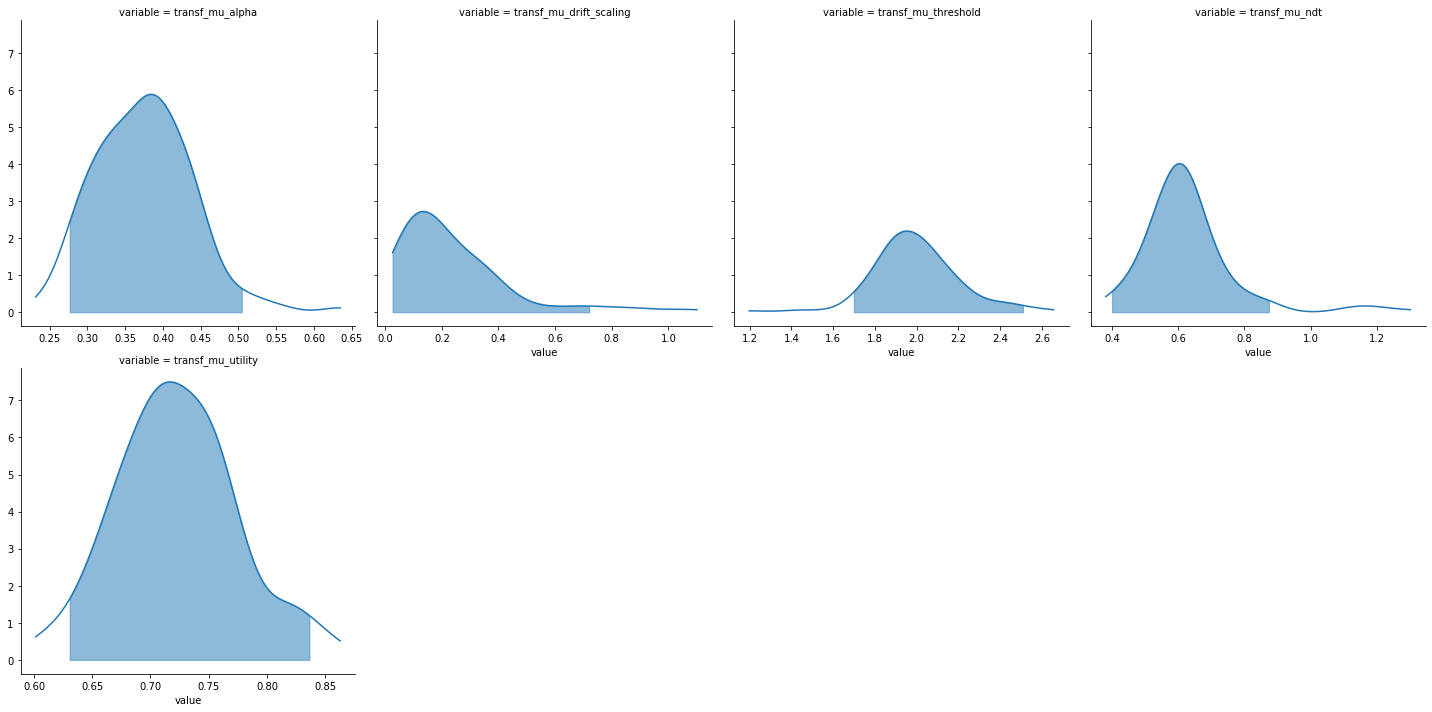

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

In [13]:
import numpy as np
import seaborn as sns

In [14]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [15]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,2,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,1,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,2,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,2,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,1,CD,1


#### Ungrouped posterior predictives:

In [16]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)

pp.head()

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         3.416728  1.407728  1.954728  0.971728  1.442728  1.358728   
2         2.439402  2.796402  2.787402  1.470402  1.031402  1.203402   
3         0.997216  2.407216  1.993216  1.558216  2.924216  1.444216   
4         1.651773  3.410773  1.725773  1.640773  1.207773  1.266773   
5         5.243526  1.787526  1.125526  1.552526  1.461526  1.148526   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      949  950  951  952   
sample                                            ...                           
1         0.999728  2.351728  1.187728  1.349728  ...      0.0  1.0  0.0  0.0   
2         1.118402  2.264402  1.623402  1.530402  ...      1.0  1.0  0.0  1.0   
3         1.282216  1.639216  1.250216  1.347216  ...      1.0  1.0  1.0  1.0   
4         2.486773  1.184773  1.099773  1.747773  ...      1.0  1.0  0.0  1.0   
5         1.030526  1.299526  1.480526  1.028526  ...      1.0  0.0  1.0  1.0   

variable                                
trial     953  954  955  956  957  958  
sample                                  
1         0.0  1.0  1.0  0.0  1.0  1.0  
2         0.0  1.0  1.0  0.0  0.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  0.0  0.0  1.0  0.0  1.0  

[5 rows x 1916 columns]

#### Grouped posterior predictives:

In [17]:
pp_grouped = model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['choice_pair', 'block_bins'], 
                                                                 n_posterior_predictives=100)

In [18]:
pp_grouped.head()

mean_accuracy   mean_rt  skewness  \
choice_pair block_bins sample                                      
AB          1          1            0.482759  1.419507  1.870577   
                       2            0.448276  1.578331  1.412966   
                       3            0.448276  1.787540  3.270163   
                       4            0.586207  1.565081  3.127161   
                       5            0.482759  1.582268  1.236324   

                               quant_10_rt_incorrect  quant_10_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    0.913939             1.037288   
                       2                    1.138255             1.188896   
                       3                    1.131071             1.003678   
                       4                    1.241505             1.125173   
                       5                    0.967318             1.081947   

                               quant_30_rt_incorrect  quant_30_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.130880             1.222612   
                       2                    1.263977             1.387686   
                       3                    1.231571             1.206613   
                       4                    1.343210             1.254524   
                       5                    1.173926             1.267918   

                               quant_50_rt_incorrect  quant_50_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.319728             1.284488   
                       2                    1.394267             1.432500   
                       3                    1.499071             1.343141   
                       4                    1.466758             1.479773   
                       5                    1.494526             1.588638   

                               quant_70_rt_incorrect  quant_70_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.540591             1.480317   
                       2                    1.744267             1.641042   
                       3                    1.640879             1.721426   
                       4                    1.560084             1.742621   
                       5                    1.693463             1.732361   

                               quant_90_rt_incorrect  quant_90_rt_correct  
choice_pair block_bins sample                                              
AB          1          1                    2.498025             1.648200  
                       2                    2.214755             2.023329  
                       3                    3.008416             1.988521  
                       4                    1.607562             2.161280  
                       5                    2.579745             2.019472

#### Plot grouped posterior predictives:

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/fits_race.py:242: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


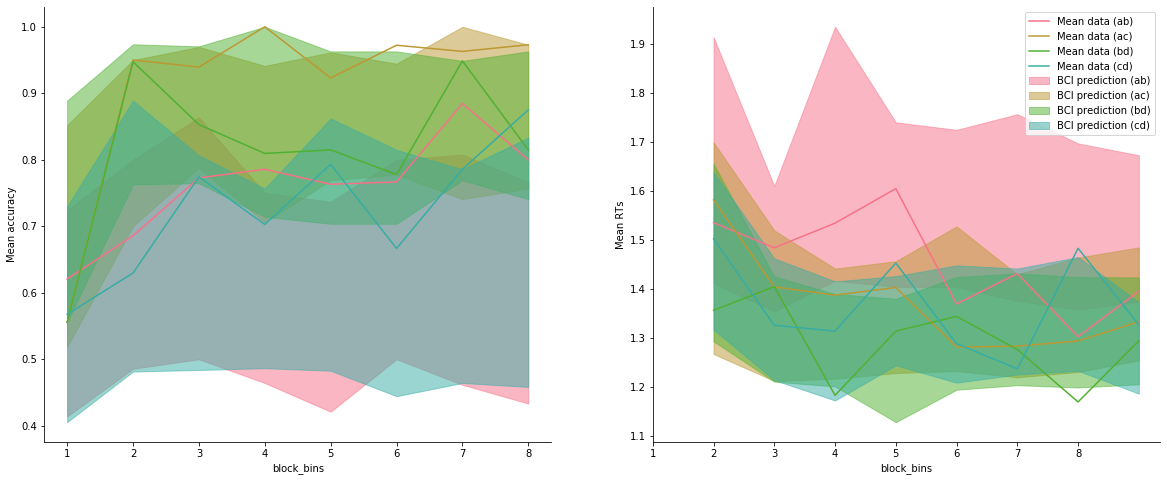

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins', 'choice_pair'],
    n_posterior_predictives=300,
    figsize=(20,8),
    hue_labels=['ab', 'ac', 'bd', 'cd'],
    hue_order=['AB', 'AC', 'BD', 'CD'],
    palette= sns.color_palette('husl'));

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/fits_race.py:242: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


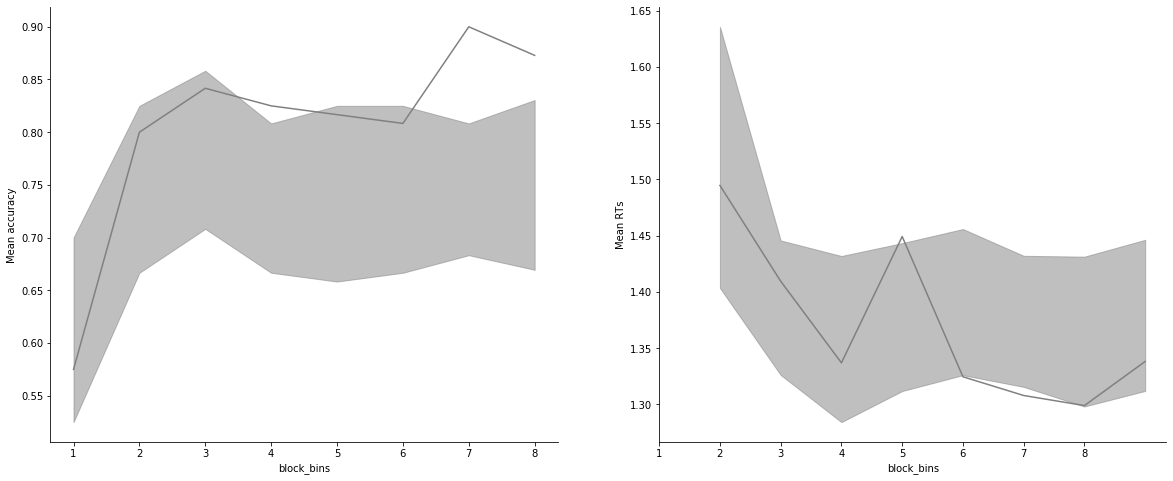

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=300,
    figsize=(20,8));

### Get starting values for further sampling

In [21]:
sv = model_fit.last_values
sv

,chain,draw,warmup,mu_alpha,mu_drift_scaling,mu_ndt,mu_threshold,mu_utility,sd_alpha,sd_drift_scaling,...,z_ndt[3],z_ndt[4],z_threshold[1],z_threshold[2],z_threshold[3],z_threshold[4],z_utility[1],z_utility[2],z_utility[3],z_utility[4]
69,0,69,0,-0.308343,0.607309,-0.196771,1.893718,0.128195,0.096497,2.854809,...,1.491882,-0.228336,-0.000346,-0.517644,-1.085003,-0.775093,0.991926,0.697761,1.329580,2.853676
139,1,69,0,-0.312696,-1.974928,0.106329,1.745340,0.016381,0.039069,2.747508,...,-0.027539,-1.209564,-0.125034,1.234405,-0.165481,0.535928,1.218424,0.457139,1.455751,1.333541
